In [1]:
import imageio
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from os import walk
import os

In [2]:
path = '../notebooks/data_3000/train/fear'

In [3]:
# removing files ending with Identifier
# this might be not necessary for everyone
# it is wired - because my folder has a lot of this Indentifier files

for f in os.listdir(path): 
    if f.endswith('Zone.Identifier'):
        os.remove(f'{path}/{f}') 

In [4]:
# walking throught the folder
# saving all filenames in a list for later use

files = []
for (dirpath, dirnames, filenames) in walk(path):
    files.extend(filenames)
print(f'>>> Original Database has {len(files)} pictures')

>>> Original Database has 2700 pictures


In [5]:
#function - reshape from 2D to 1D

def get_pixels(array):
    pixels = []
    for row in array:
        for pixel in row:
            pixels.append(pixel)
    return pixels

In [6]:
# creating a dict to store all pixels

files_dict = {}
for f in files:
    files_dict[f] = get_pixels(imageio.imread(f'{path}/{f}'))

In [7]:
# converting to a DF

df = pd.DataFrame(files_dict)

In [8]:
# creating a statistic package (dict)

describe_dict = {}
for col in df.columns:
    describe_dict[col] = df[col].describe()

In [9]:
# converting to a DF and Transpose

describe_df = pd.DataFrame(describe_dict).loc[['mean','25%','50%','75%']].T

In [14]:
# using Boolean mask to fitler duplicated rows
# [keep = False] means DF will keep both picure (original + duplicated ones)

duplicated_pictures_df_1 = describe_df[describe_df.duplicated(['mean','25%','50%','75%'], keep = False)].sort_values(['mean'])
print(f">>> There are {duplicated_pictures_df_1.shape[0]} pictures ready to be visualized, including the original picture and duplicated ones")
duplicated_pictures_df_1

>>> There are 237 pictures ready to be visualized, including the original picture and duplicated ones


mean    25%    50%    75%
img_6524.png    58.433693   22.0   54.0   87.0
img_14013.png   58.433693   22.0   54.0   87.0
img_11524.png   61.731326    0.0   32.0  119.0
img_23931.png   61.731326    0.0   32.0  119.0
img_12732.png   66.047313   34.0   52.0   93.0
...                   ...    ...    ...    ...
img_19097.png  196.856346  189.0  201.0  216.0
img_7990.png   196.856346  189.0  201.0  216.0
img_35826.png  196.856346  189.0  201.0  216.0
img_16039.png  213.467494  204.0  221.0  234.0
img_14912.png  213.467494  204.0  221.0  234.0

[237 rows x 4 columns]

<ipython-input-13-e6cd1967a9c4>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


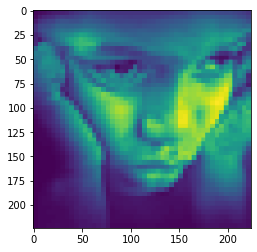

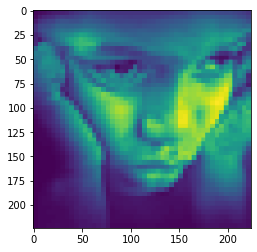

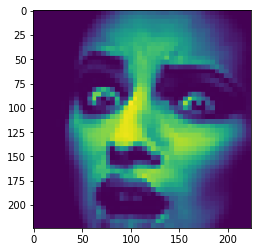

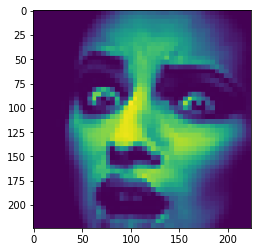

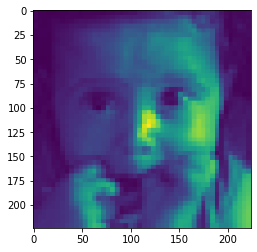

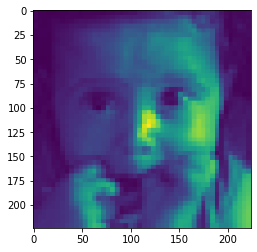

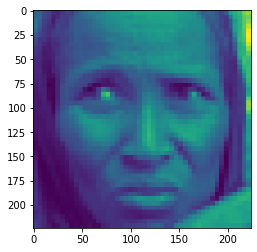

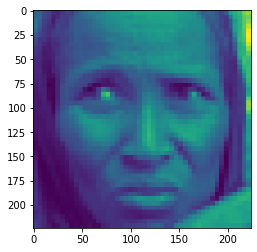

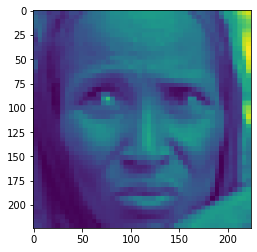

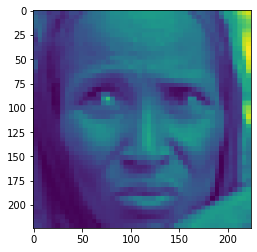

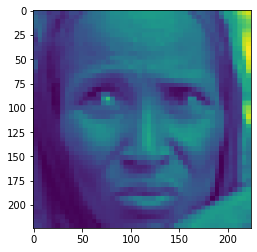

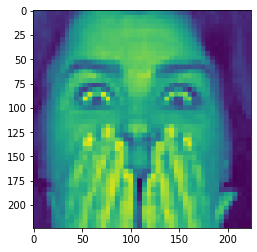

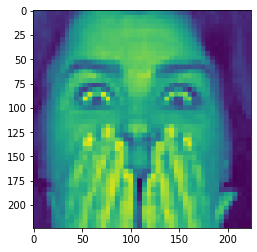

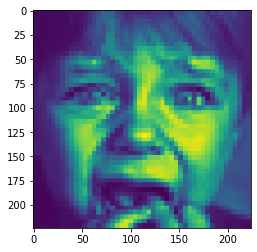

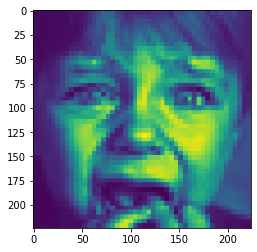

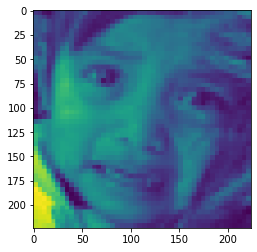

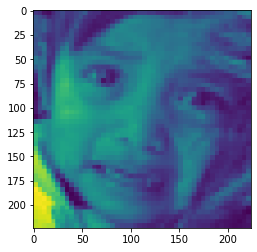

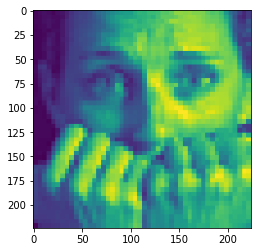

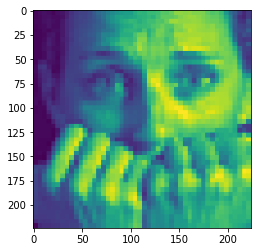

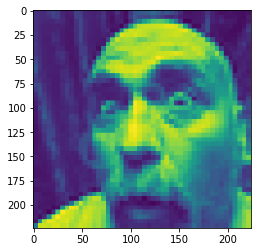

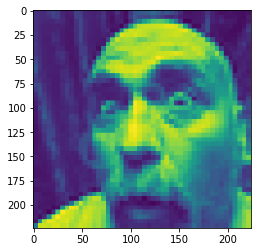

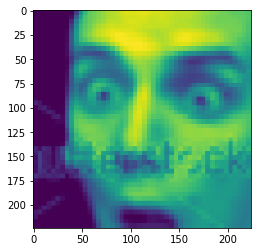

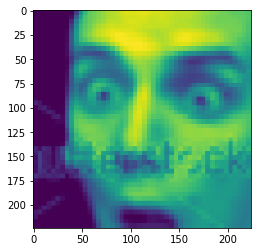

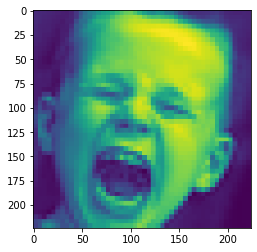

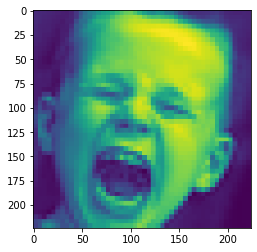

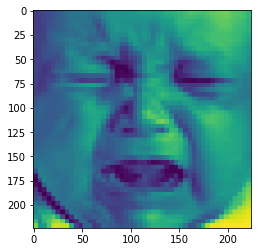

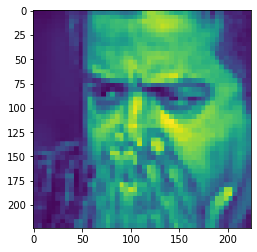

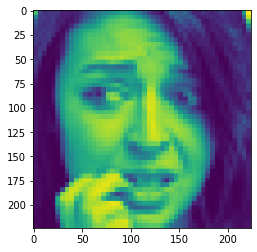

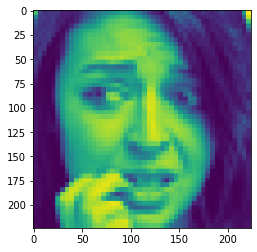

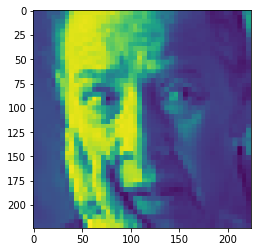

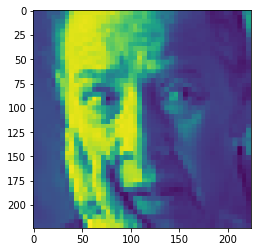

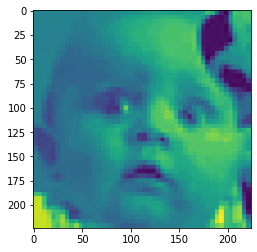

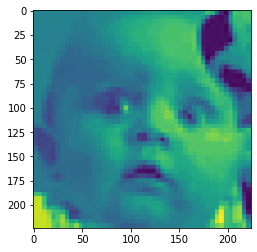

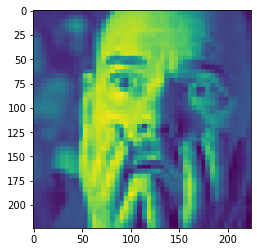

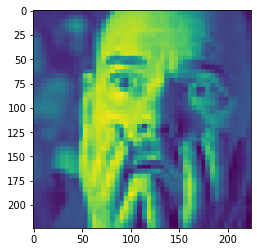

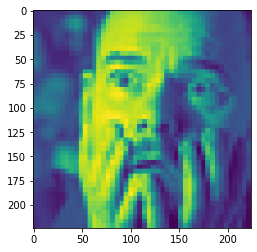

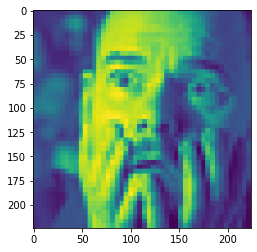

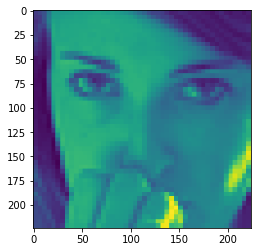

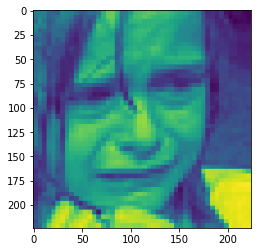

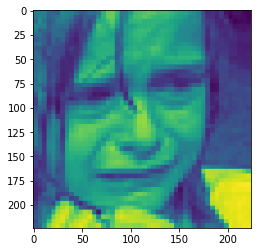

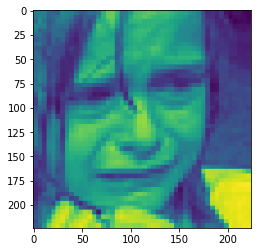

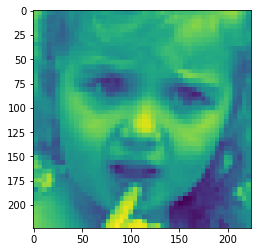

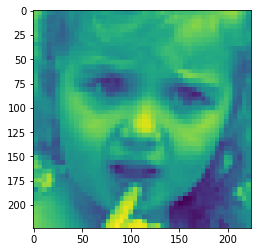

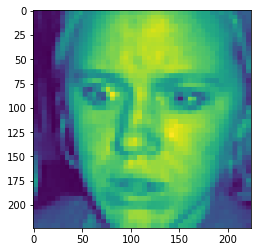

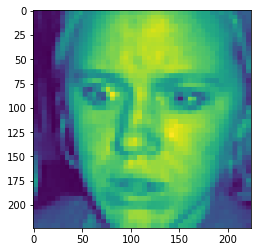

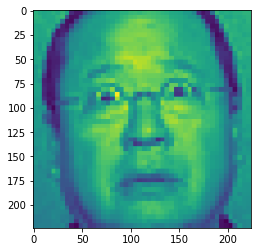

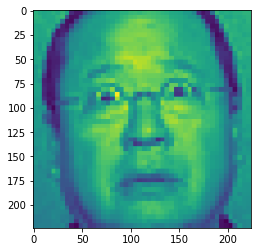

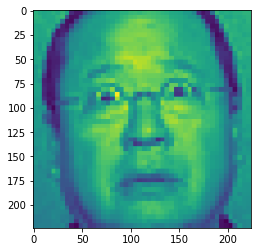

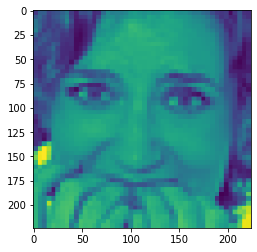

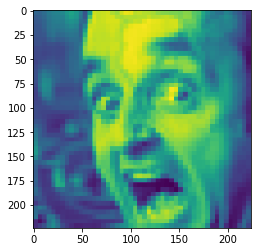

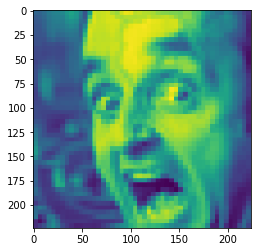

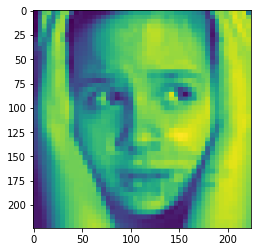

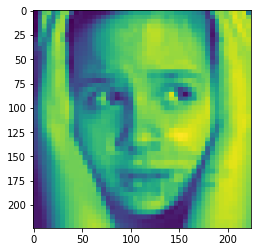

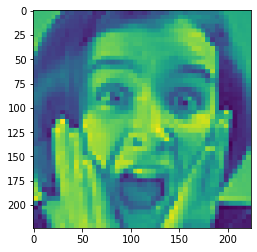

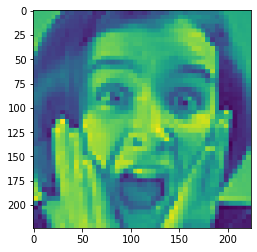

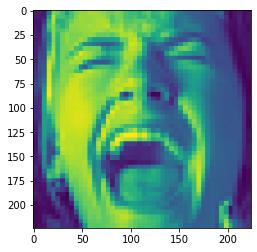

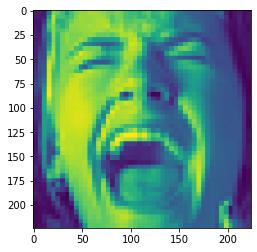

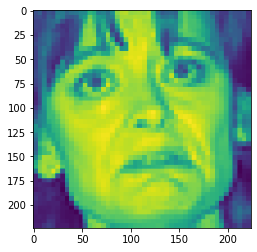

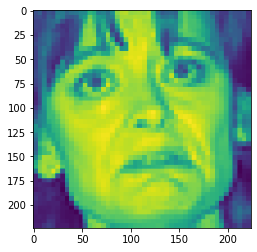

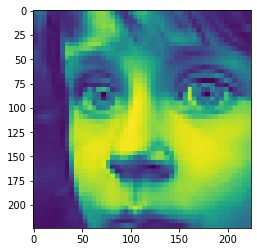

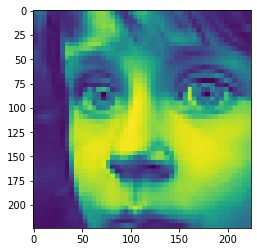

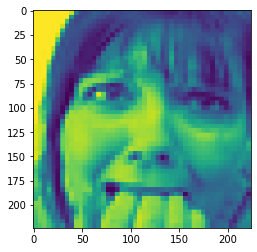

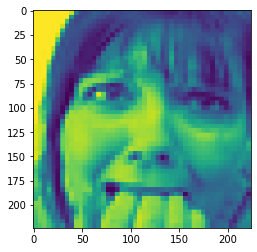

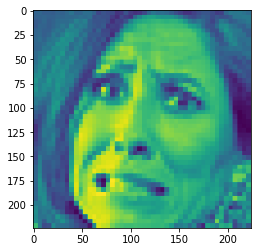

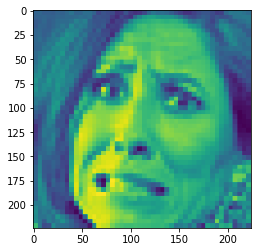

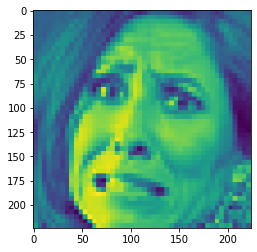

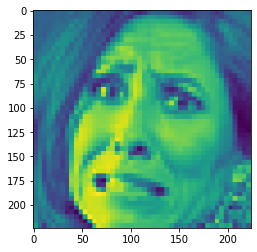

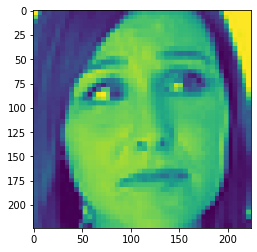

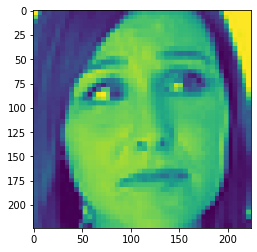

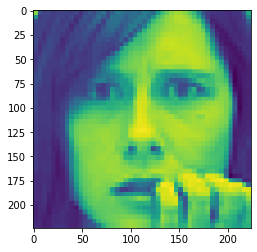

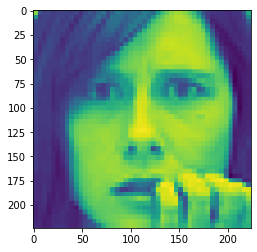

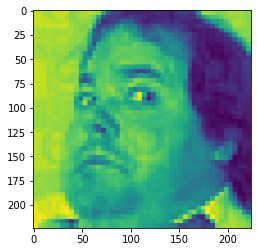

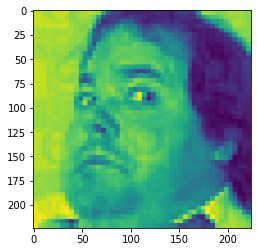

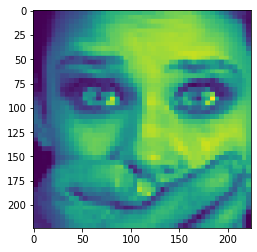

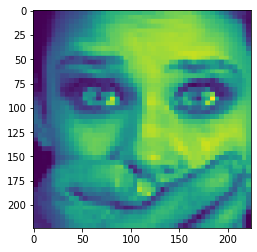

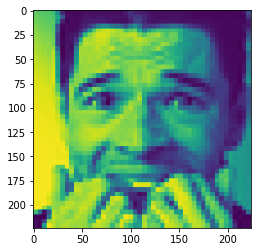

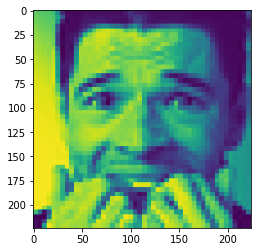

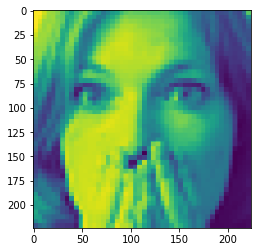

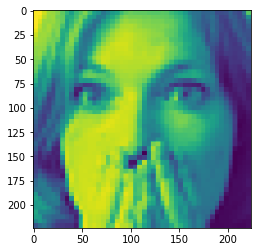

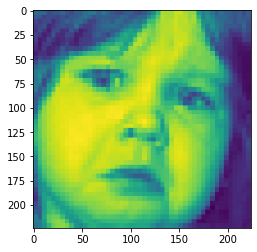

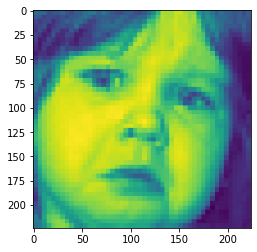

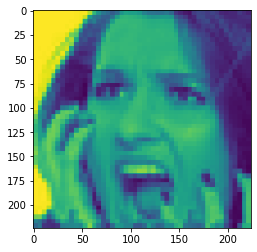

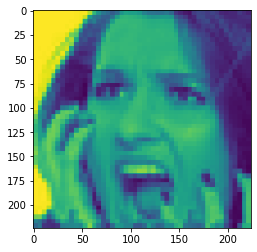

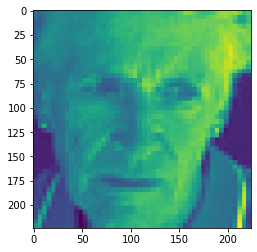

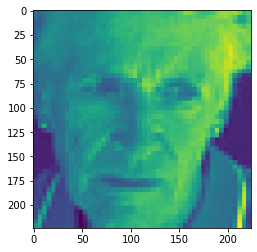

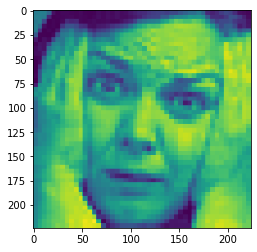

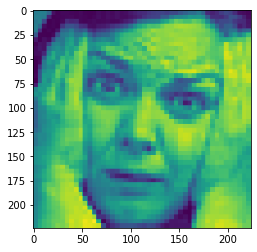

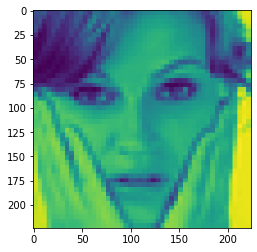

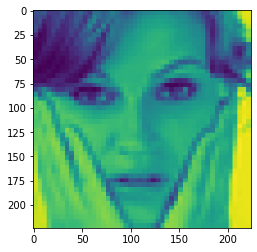

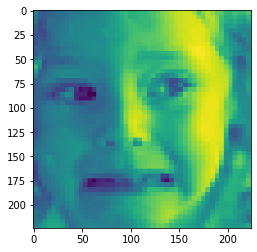

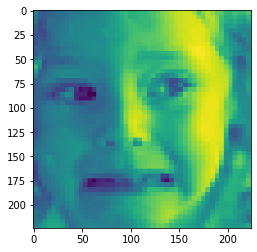

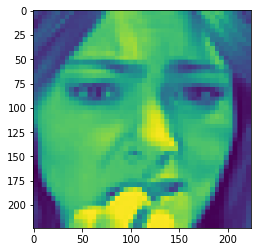

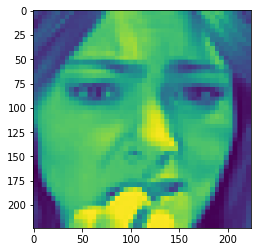

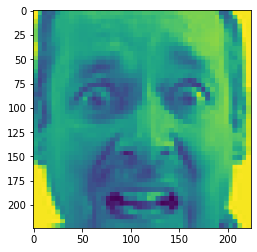

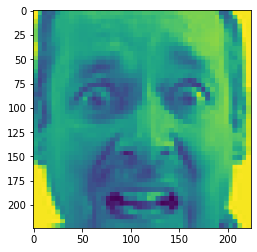

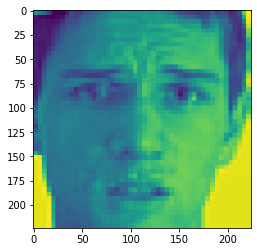

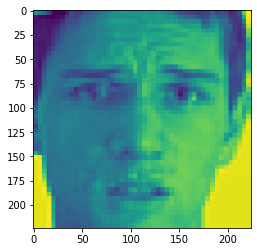

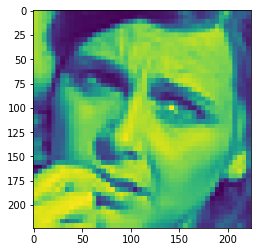

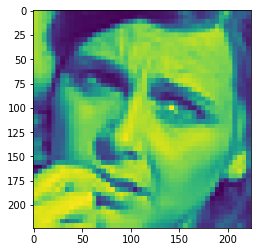

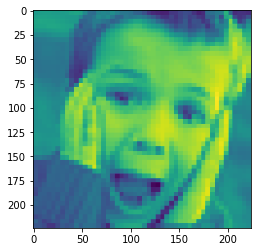

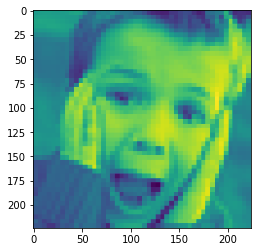

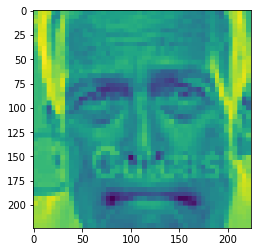

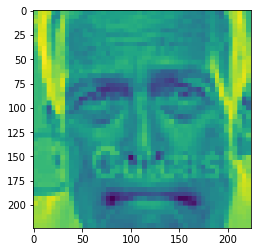

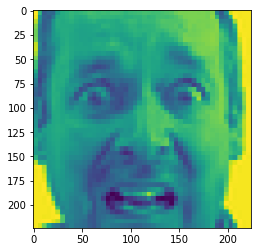

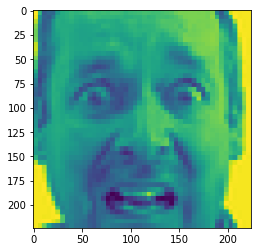

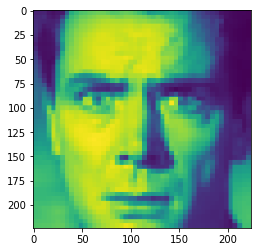

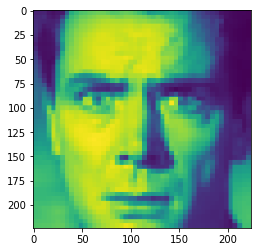

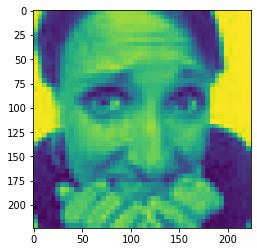

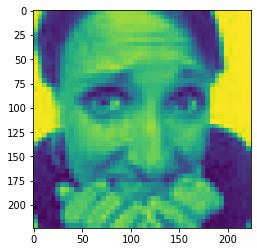

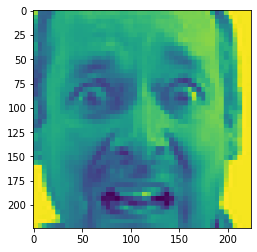

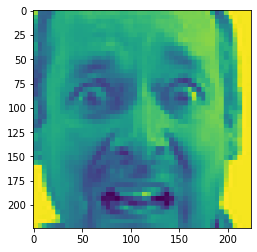

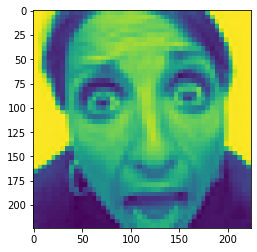

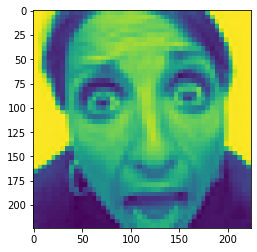

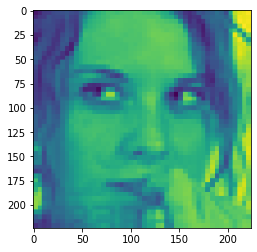

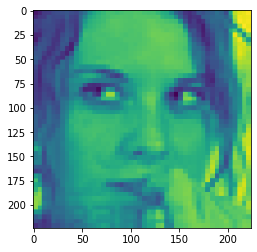

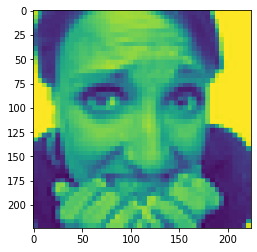

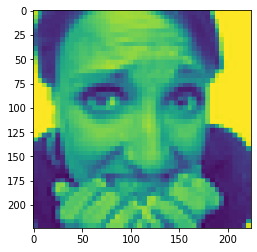

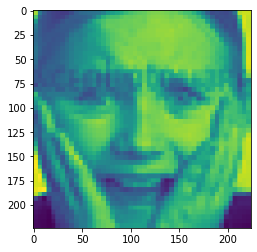

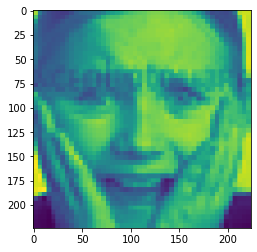

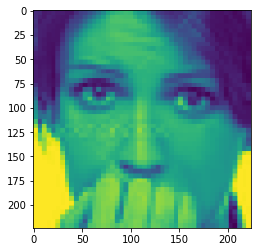

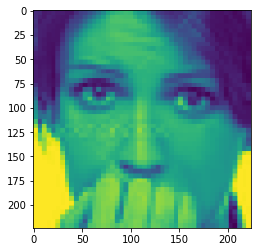

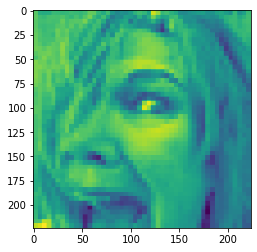

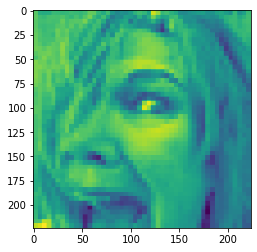

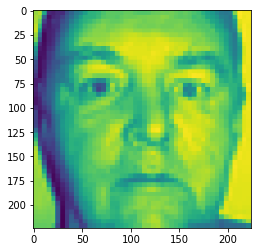

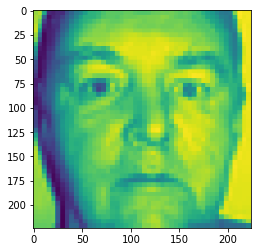

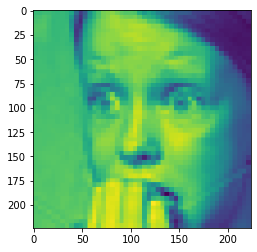

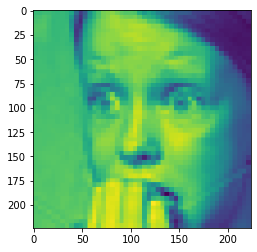

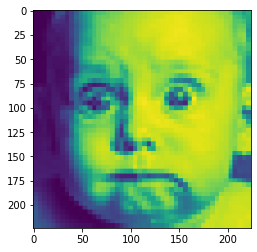

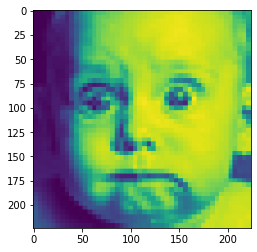

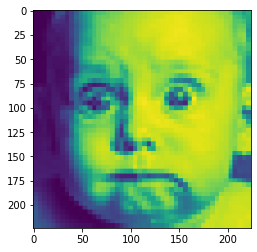

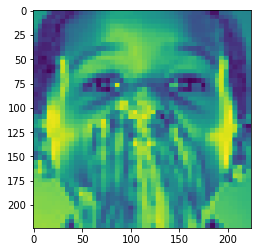

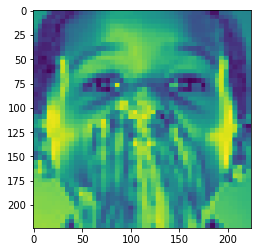

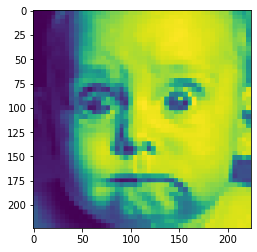

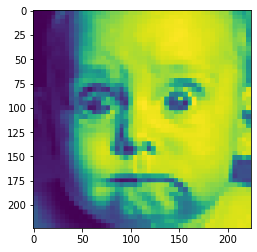

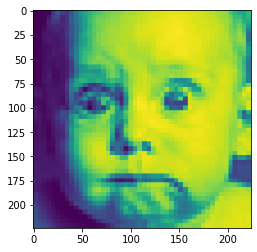

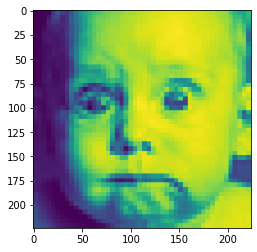

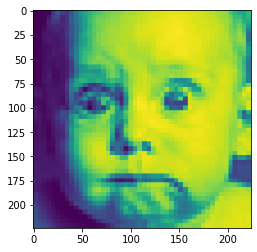

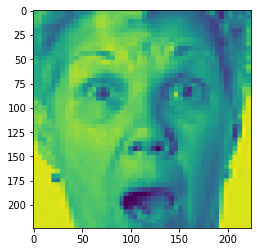

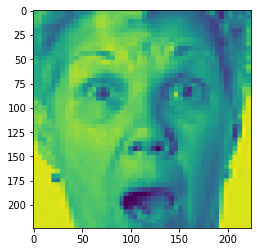

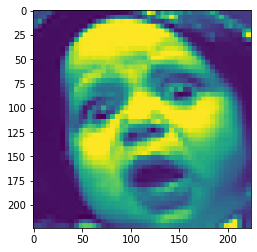

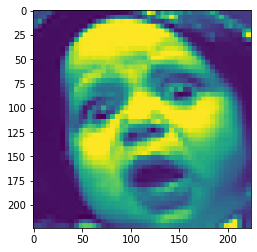

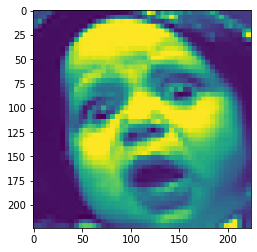

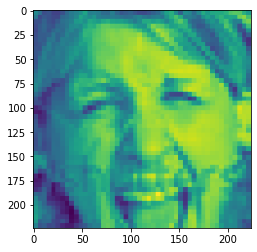

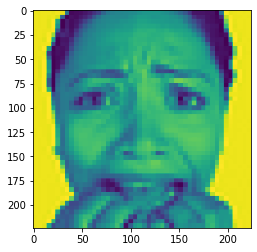

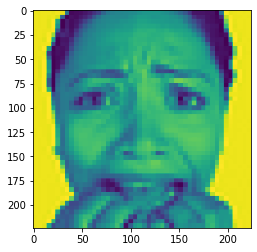

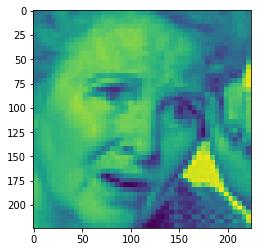

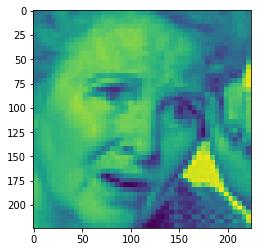

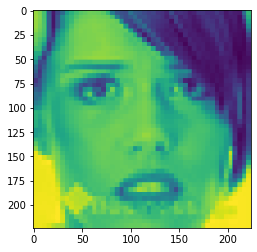

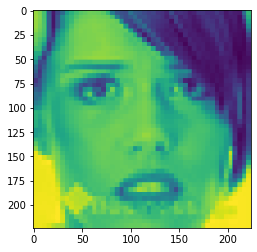

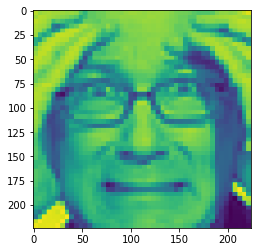

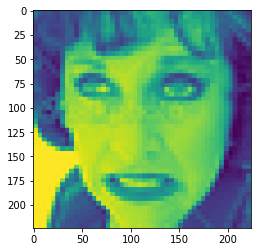

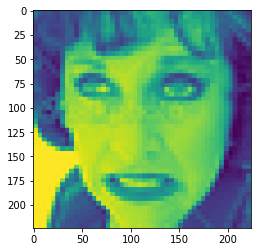

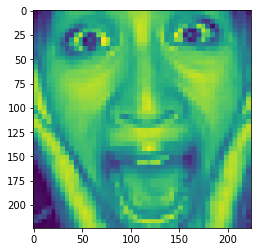

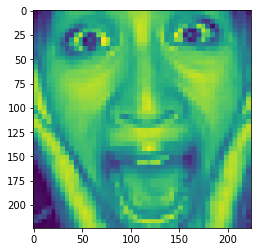

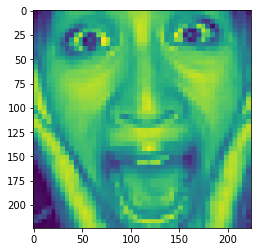

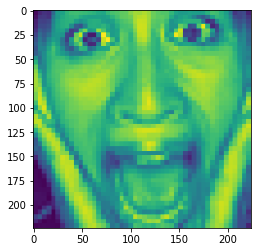

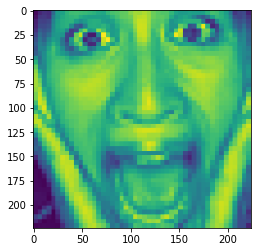

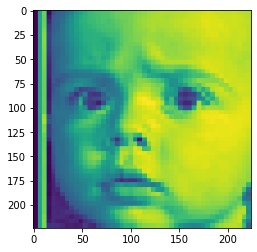

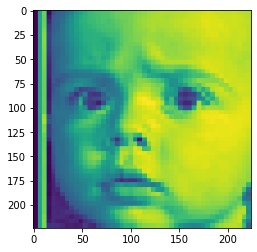

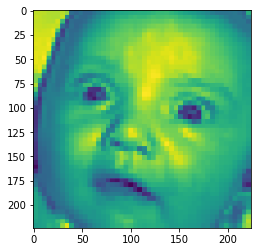

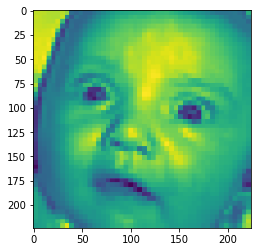

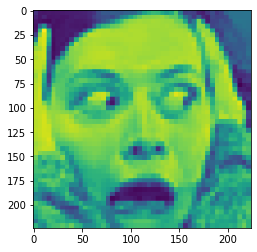

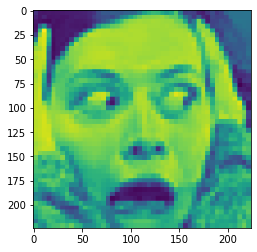

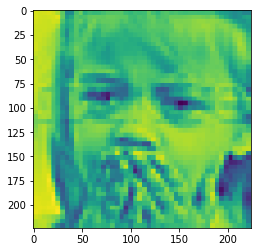

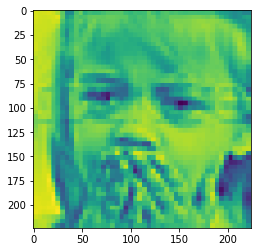

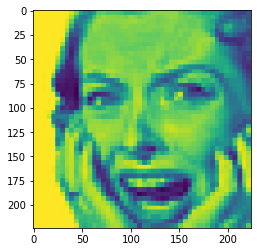

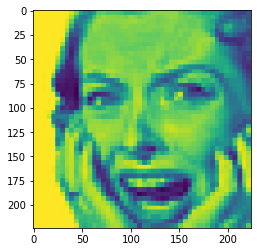

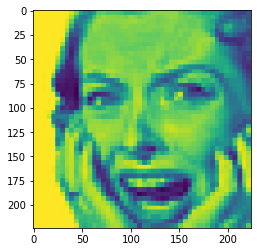

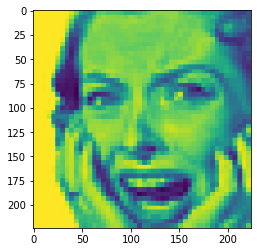

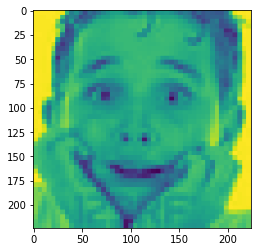

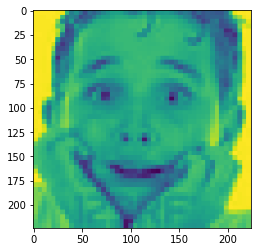

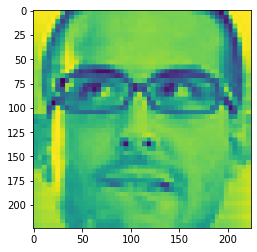

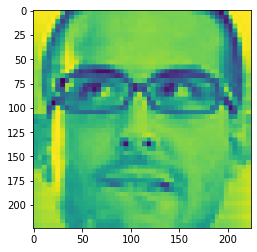

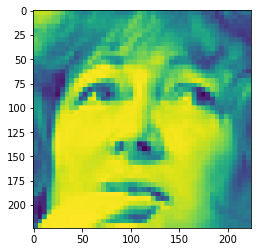

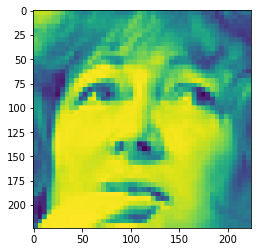

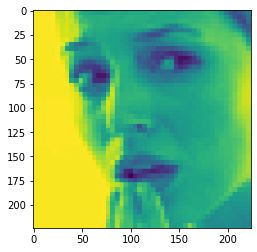

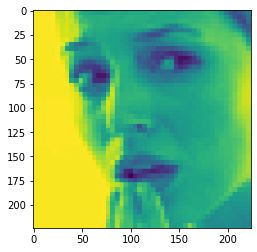

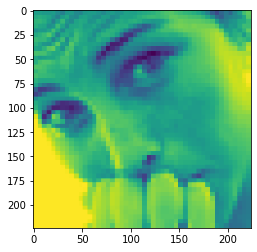

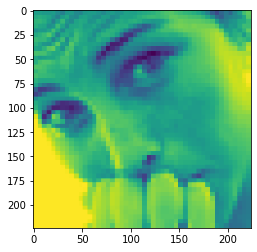

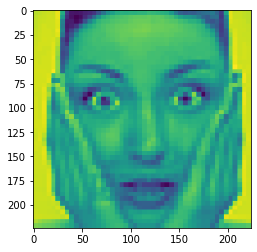

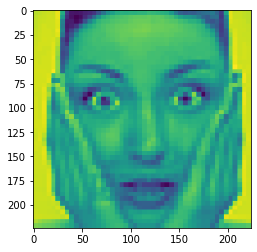

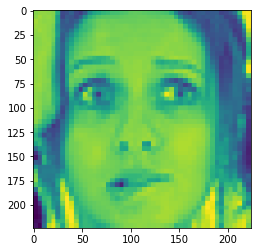

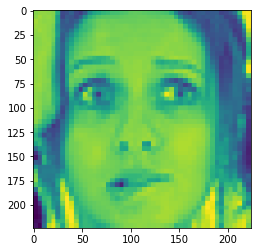

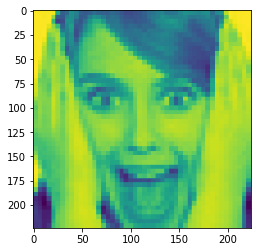

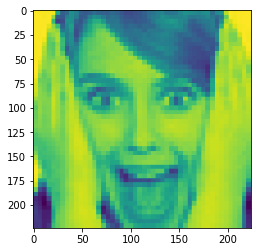

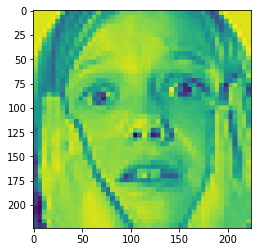

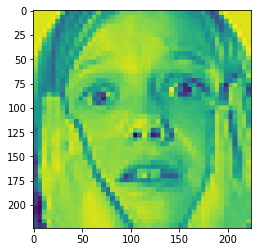

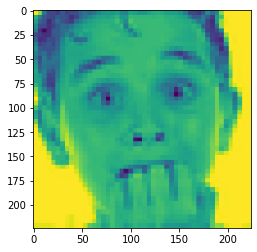

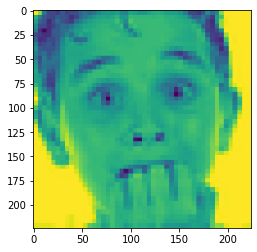

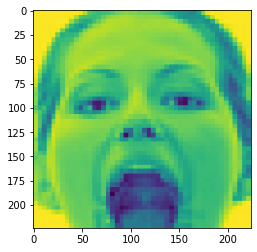

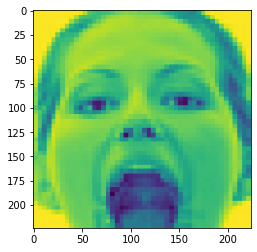

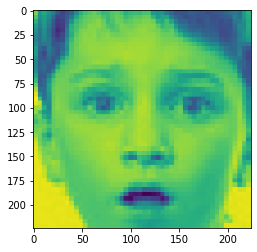

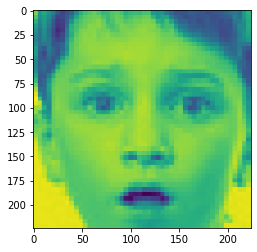

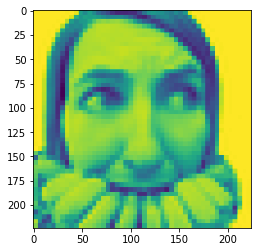

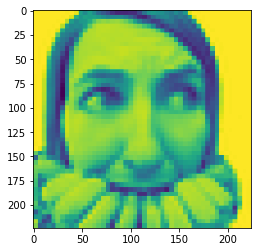

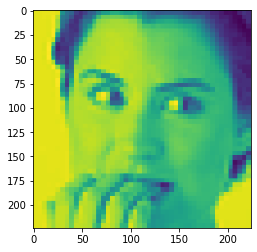

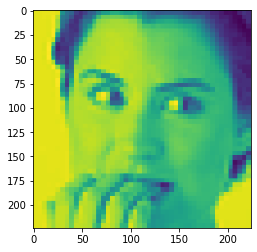

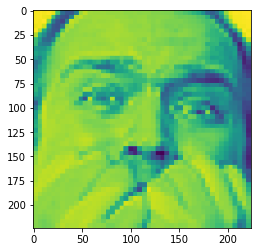

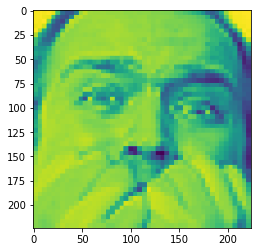

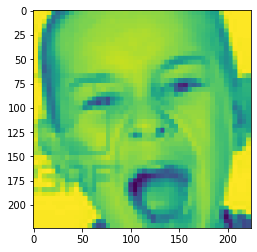

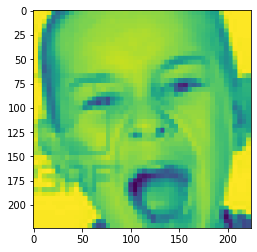

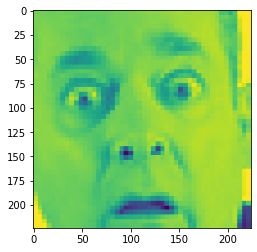

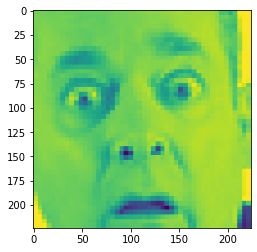

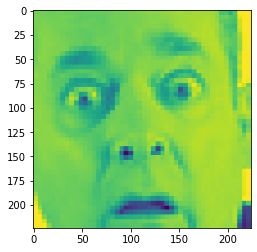

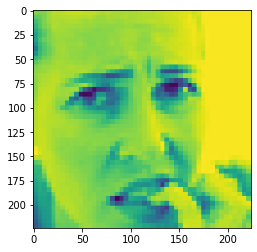

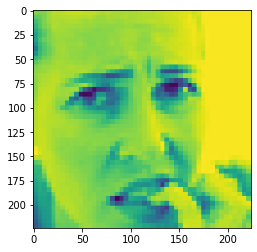

In [13]:
# Visualizing both original and duplicated ones

# ploting both original image and duplicated images to make sure we are detecting the right pictures

# this function is not inside of VS

import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for dup_pic in duplicated_pictures_df_1.index:
    filename = f'{path}/{dup_pic}'
    process(filename)

In [17]:
# We only want to delete the duplicated ones but keep the original picture
# so we have to turn the [keep = False] off

duplicated_pictures_df_2 = describe_df[describe_df.duplicated(['mean','25%','50%','75%'])].sort_values(['mean'])
dup_pictures = duplicated_pictures_df_2.index
print(f">>There are {dup_pictures.shape[0]} duplicated pictures been detected")
print(f">>If you are happy with the above details, we will now remove the duplicated pictures by runing next cell")


>>There are 125 duplicated pictures been detected
>>If you are happy with the above details, we will now remove the duplicated pictures by runing next cell


In [18]:
# removing the duplicated pictures

for p in os.listdir(f'{path}'): 
    if p in dup_pictures:
        os.remove(f'{path}/{p}')

In [20]:
# checking shape of cleaned dataset 
cleaned_files = []
for (dirpath, dirnames, filenames) in walk(path):
    cleaned_files.extend(filenames)
print(f'>>> Cleaned Database now has {len(cleaned_files)} pictures')

>>> Cleaned Database now has 2575 pictures
